<a href="https://colab.research.google.com/github/TienLungSun/AI-Intelligent-Elderly-Care/blob/main/2.%20Process_location_time_series(v4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

讀 multiple sujbects 之 multiple months 之csv檔, 每個 subject 輸出一張 scatter plot
 
每個csv數據檔為某一subject在某一月份之每天1440分之location資料

程式使用說明影片: https://youtu.be/la-OSRabyVo

居家紅外線感測器數據分析介紹影片: https://youtu.be/30ZUpCnRuCI

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
#選擇所有要分析之sujbect之各月份之csv檔
from google.colab import files
uploaded = files.upload()
fnameLst = list(uploaded.keys())

Saving new_001_2019_03.csv to new_001_2019_03.csv
Saving new_001_2019_04.csv to new_001_2019_04.csv
Saving new_001_2019_05.csv to new_001_2019_05.csv
Saving new_001_2019_06.csv to new_001_2019_06.csv
Saving new_001_2019_07.csv to new_001_2019_07.csv
Saving new_001_2019_08.csv to new_001_2019_08.csv
Saving new_001_2019_09.csv to new_001_2019_09.csv
Saving new_002_2019_03.csv to new_002_2019_03.csv
Saving new_002_2019_04.csv to new_002_2019_04.csv
Saving new_002_2019_05.csv to new_002_2019_05.csv
Saving new_002_2019_06.csv to new_002_2019_06.csv
Saving new_002_2019_07.csv to new_002_2019_07.csv
Saving new_002_2019_08.csv to new_002_2019_08.csv
Saving new_002_2019_09.csv to new_002_2019_09.csv
Saving new_003_2019_03.csv to new_003_2019_03.csv
Saving new_003_2019_04.csv to new_003_2019_04.csv
Saving new_003_2019_05.csv to new_003_2019_05.csv
Saving new_003_2019_06.csv to new_003_2019_06.csv
Saving new_003_2019_07.csv to new_003_2019_07.csv
Saving new_003_2019_08.csv to new_003_2019_08.csv


In [ ]:
#Process the file name list to get subjectID and Months
SubjectIDLst =[]
MonthLst = []
for fname in fnameLst:
  fnamePrefix = fname.split(".")[0] # Assume fname format: new_001_2019_07.csv 
  monthString = fnamePrefix.split("_")[-1]
  MonthLst.append(monthString)
  subjectIDString = fnamePrefix.split("_")[1]
  SubjectIDLst.append(subjectIDString)
SubjectIDLst = list(dict.fromkeys(SubjectIDLst)) #remove duplicates
MonthLst = list(dict.fromkeys(MonthLst))
print(SubjectIDLst, "\n", MonthLst)

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010'] 
 ['03', '04', '05', '06', '07', '08', '09']


In [ ]:
# 把某一 time period 的 categorical time series 轉成 5-tuple features = (此時段在客廳的比例, ...)
def calculate_period_feature(x):
  loc0 = loc1 = loc2 = loc3 =loc4 = 0
  total = len(x)
  for label in x:
    if(label == 0): # 0.大門
      loc0 +=1
    elif(label == 1): #1.客廳
      loc1 +=1
    elif(label == 2): #2.臥室
      loc2 +=1
    elif(label == 3): #3.廁所(浴室)
      loc3 +=1
    elif(label == 4): #4.廚房
      loc4 +=1
  return [loc0/total, loc1/total, loc2/total, loc3/total, loc4/total]

In [ ]:
# df = the csv file contain 某一subject在某一月份之每天1440分之location資料
def Calculate_DailyBehaviors(df):
  dateLst = []
  daily_behavior_features = [] #behavior features of this date
  for index, row in df.iterrows():
    dateLst.append(row[0])
    period_behavior_features = []
    for period in __period_lst: #考慮的區間,e.g.,[[0-6],[8-12]]
      period_start = period[0]*60+1
      period_end = period[1]*60+1
      x = row[period_start: period_end]
      period_feature = calculate_period_feature(x)
      period_behavior_features.extend(period_feature)
    daily_behavior_features.append(period_behavior_features)
  return dateLst, daily_behavior_features

In [ ]:
#定義 tSNE
perplexity = 5
tsne = TSNE(perplexity=perplexity, n_components=2, init='pca', n_iter=5000)

In [ ]:
#設定考慮的區間,例如[[0-6],[8-12]]為2個區間,分別是0-6時,8-12時等
#__period_lst =  [[0,6],[6,12],[12,15],[15,19],[19,24]]
#__period_lst =  [[0,2],[2,4],[4,6],[6,8],[8,10],[10,12],[12,14],[14,16],[16,18],[18,20],[20,22],[22,24]]
#__period_lst = [[0,2],[2,4],[4,6],[20,22],[22,24]]
__period_lst = [[7,12]]
#__period_lst = [[14,16],[16,18]]

Main program

Process Subject  001: 03, 04, 05, 06, 07, 08, 09, 
Process Subject  002: 03, 04, 05, 06, 07, 08, 09, 
Process Subject  003: 03, 04, 05, 06, 07, 08, 09, 
Process Subject  004: 03, 04, 05, 06, 07, 08, 09, 
Process Subject  005: 03, 04, 05, 06, 07, 08, 09, 
Process Subject  006: 03, 04, 05, 06, 07, 08, 09, 
Process Subject  007: 03, 04, 05, 06, 07, 08, 09, 
Process Subject  008: 03, 04, 05, 06, 07, 08, 09, 
Process Subject  009: 03, 04, 05, 06, 07, 08, 09, 
Process Subject  010: 03, 04, 05, 06, 07, 08, 09, 


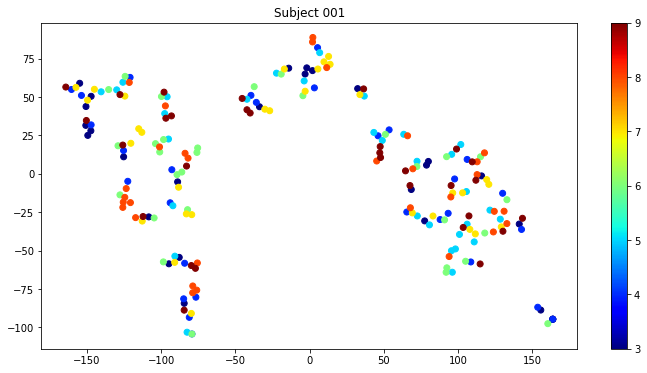

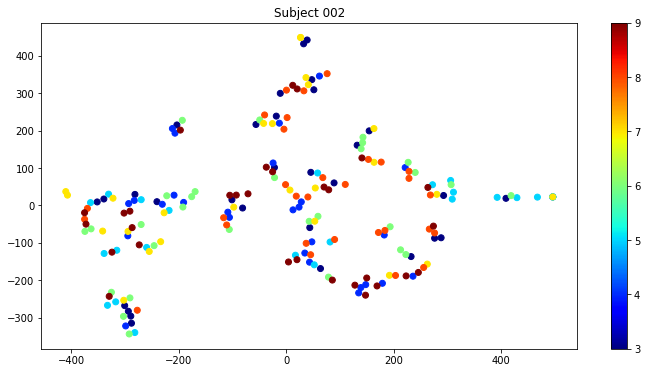

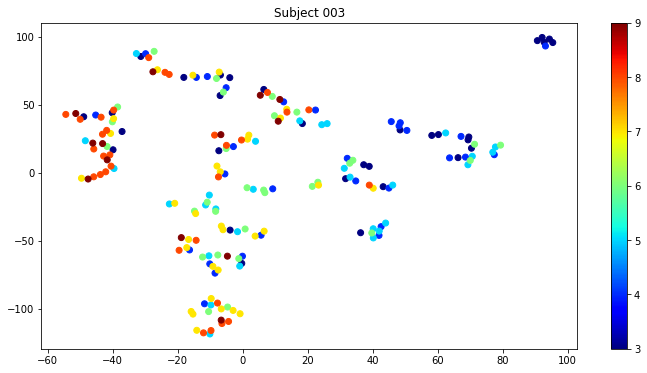

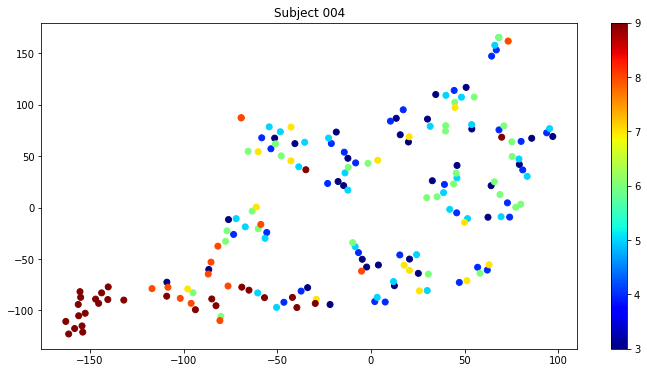

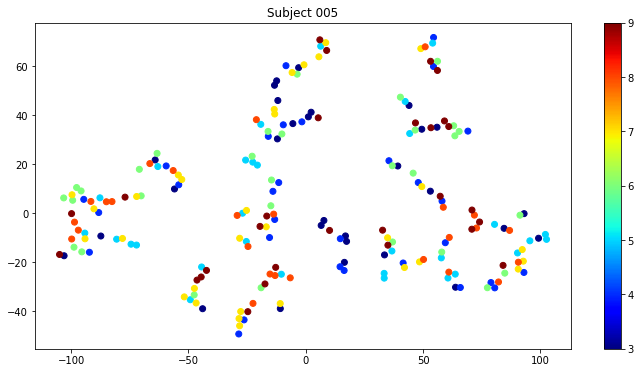

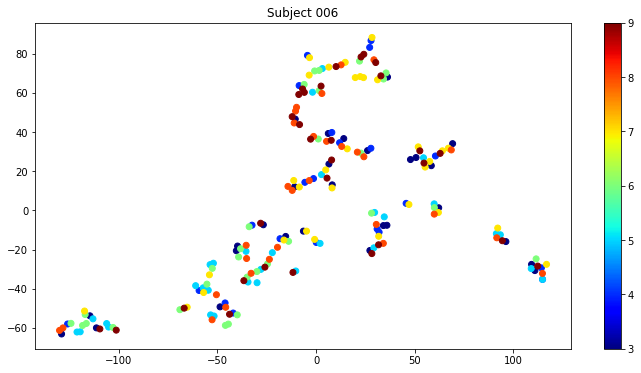

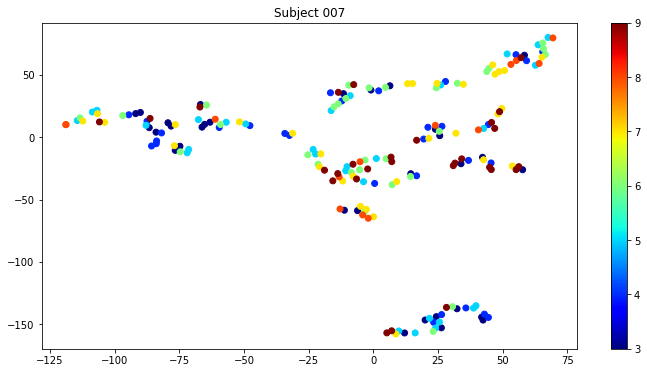

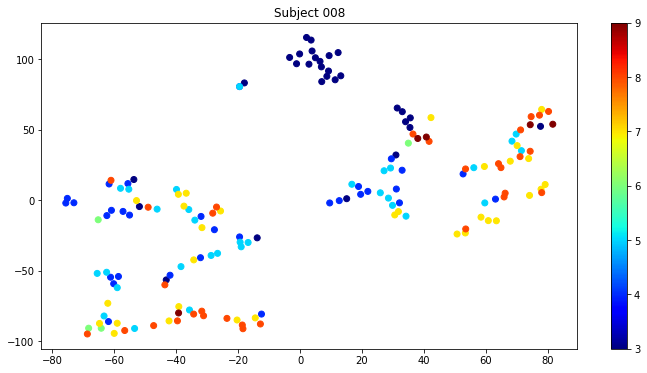

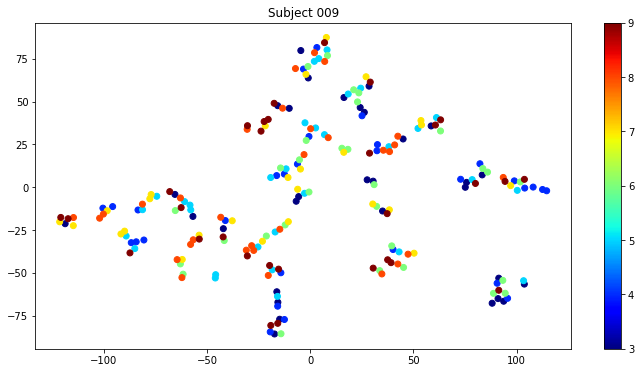

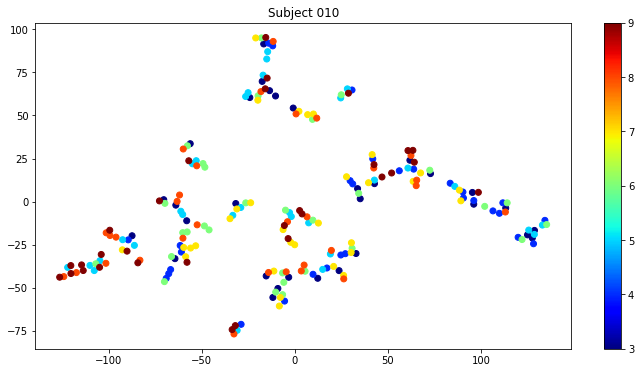

In [ ]:
for subjectIDString in SubjectIDLst:
  #read all the months data of this subject
  TotalColorLst = []
  TotaldateLst = []
  TotalDailyBehavior = []
  print("Process Subject ", subjectIDString, end = ": ")
  for monthString in MonthLst:
    fname = "new_" + subjectIDString + "_2019_" + monthString + ".csv" 
    if(fname not in fnameLst):
      print("No data file for subject ", subjectIDString, " of month ", monthString)
    else:
      print(monthString, end = ", ")
      df=pd.read_csv(fname)
      dateLst, DailyBehaviors = Calculate_DailyBehaviors(df)
      TotalColorLst.extend([int(monthString) for i in range(len(dateLst))]) #[month, month, ...]
      TotaldateLst.extend(dateLst)
      TotalDailyBehavior.extend(DailyBehaviors)
  print()
  
  #Save behavior features
  dateArray = np.array(TotaldateLst)
  dateArray = dateArray.reshape(dateArray.shape[0], 1)
  TotalDailyBehaviorArray = np.array(TotalDailyBehavior)
  outArray = np.hstack((dateArray, TotalDailyBehaviorArray))
  csvFname = subjectIDString + "_behavior features.csv"
  df1 = pd.DataFrame(outArray)
  df1.to_csv(csvFname, index=False)

  #use t-SNE to reduce daily behavior features to 2D for visualization and cluster detection
  x=tsne.fit_transform(TotalDailyBehavior)

  #Save scatter plot
  plt.figure(figsize=(12,6))
  plt.scatter(x[:, 0], x[:, 1], c=TotalColorLst, cmap="jet")
  title = "Subject " + subjectIDString
  plt.title(title)
  plt.colorbar()
  imgFname = subjectIDString + "(perplexity =" + str(perplexity) + ").jpg"
  plt.savefig(imgFname) 

  #Save t-SNE results to csv for Tableau exploration
  outArray = np.hstack((dateArray, x))
  csvFname = subjectIDString + "(perplexity =" + str(perplexity) + ").csv"
  df1 = pd.DataFrame(outArray)
  df1.to_csv(csvFname, index=False)